<a href="https://colab.research.google.com/github/RylieWeaver9/Machine-Learning/blob/main/Manual_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I'll be using linear regression, which is a form of MLE. Linear regression is equivalent to MLE with this type of data.

In [ ]:
# print(x.shape)
# print(y.shape)
# print(phi_x.shape)
# print(model.coef_)
# print(model.intercept_)

These are just some useful calls that I put here for help remembering.

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
plt.style.use('default')

# Data Points
x  = np.array([-1.87, -1.76, -1.67, -1.22, -0.07, 0.11, 0.67, 1.60, 2.22, 2.51]).reshape(-1,1)
y = np.array([0.06, 1.67, 0.54, -1.45, -0.18, -0.67, 0.92, 2.95, 5.13, 5.18]).reshape(-1,1)

Here I import the necessary libraries and the data points. I also reshape the data points so that they are an array (dimension 2) instead of a list (dimension 1). This way, the x and y data can be used as inputs correctly.

12.778898321696822
1.277889832169682
1.9843594673128504


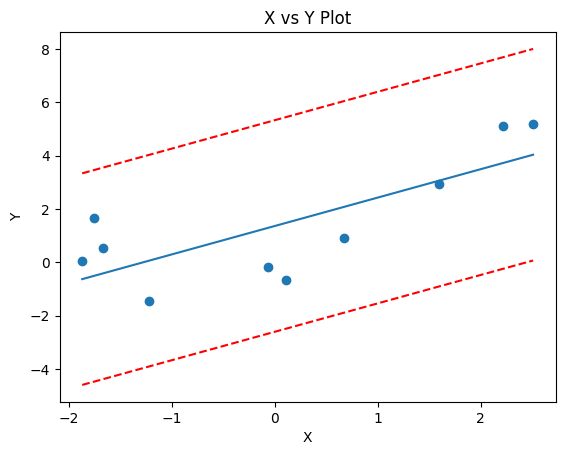

In [ ]:
#Make Phi Array
one = np.ones((len(x),1))
phi_x = np.concatenate((x, one), axis=1)

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(phi_x, y)

# Calculate Error
error = np.sum(abs(y - model.predict(phi_x)))
error_mean = error/len(x)
error_var = np.var(y - model.predict(phi_x))
print(error)
print(error_mean)
print(error_var)

# Make boundary lines
up_error = model.predict(phi_x) + 2*error_var
down_error = model.predict(phi_x) - 2*error_var

# Label plot
plt.title('X vs Y Plot')
plt.xlabel('X')
plt.ylabel('Y')

# Plot and show
plt.plot(x, model.predict(phi_x))
plt.plot(x, up_error, '--r')
plt.plot(x, down_error, '--r')
plt.scatter(x, y)
plt.show()

I'll walk through all the code steps for this first plot, then note the changes for the later plots. 

The basic idea of all of these plots is to use matrix multiplication to make any regression into linear regression. The way this happens is by making a matrix 'phi_x' with it's columns being the basis functions you want to regress with (evaluated as the x_i data points), then linearly regress phi_x with the y coordinates. By finding the coefficients matrix to multiply phi_x with to regress with y, we get the coefficients to the basis functions! Basically, it's Linear Algebra to make any regression problem a linear regression.

In order to do this, I first need to define phi_x with the basis functions. The basis function 'x' is easy to input, but I need to make a column vector of ones to stand in for the constant term.

Then, I compute the error, mean error, and error variance of the data set. This is fairly straightforward once I knew the code commands. Using the error variance, I was able to make the boundary lines above my regression.

Finally, I labelled my plot, did some styling, and plotted my data/regression.

5.715197743894801
0.5715197743894801
0.4506356790281812


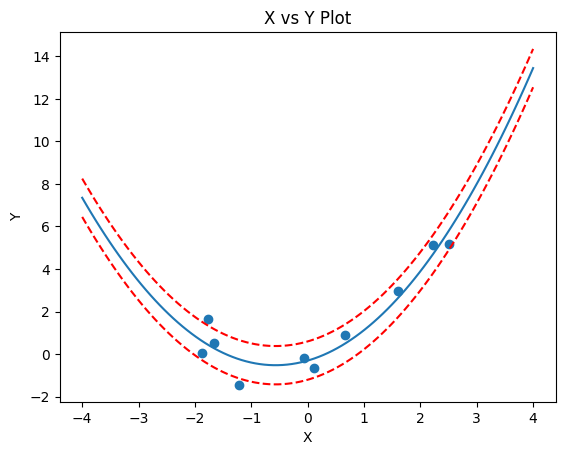

In [ ]:
#Make Phi Array
one = np.ones((len(x),1))
phi_x = np.concatenate((x**2, x, one), axis=1)

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(phi_x, y)

# Make data for smooth graph
test_x = np.linspace(-4,4, 100).reshape(-1,1)
one_v = np.ones((len(test_x),1))
phi_test = np.concatenate((test_x**2, test_x, one_v), axis=1)

# Calculate error
error = np.sum(abs(y - model.predict(phi_x)))
error_mean = error/len(x)
error_var = np.var(y - model.predict(phi_x))
print(error)
print(error_mean)
print(error_var)

# Make boundary lines
up_error = model.predict(phi_test) + 2*error_var
down_error = model.predict(phi_test) - 2*error_var

# Label plot
plt.title('X vs Y Plot')
plt.xlabel('X')
plt.ylabel('Y')

# Plot and show
plt.plot(test_x, model.predict(phi_test))
plt.plot(test_x, up_error, '--r')
plt.plot(test_x, down_error, '--r')
plt.scatter(x, y)
plt.show()

The steps are very similar here, except that now I make a 'test_x' data set for smoother plotting. Instead of using the sparse points from the original data set, I input the many points from the 'test_x' data set into the model. Important, though, is that I make sure the model is still trained on 'x', and not 'test_x'. That would be very bad. 

Introducing 'test_x' meant I had to change the inputs from 'x' to 'test_x' for a few things, but that was fine. Done carefully so as to not mess up any other things, this makes the graph much more readable and smooth.

12.215740277603999
1.2215740277604
1.8175174721625613


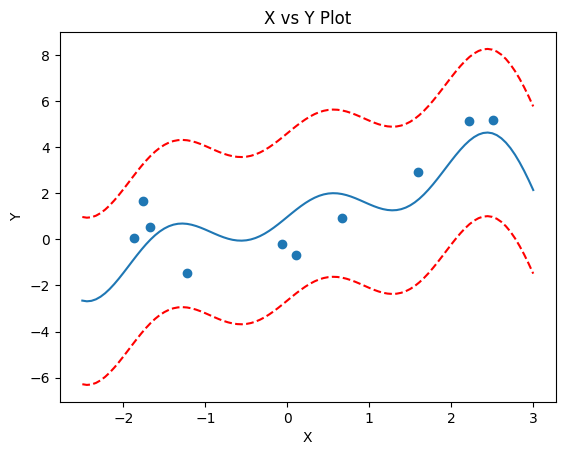

In [ ]:
#Make Phi Array
one = np.ones((len(x),1))
phi_x = np.concatenate((np.sin(3*x), np.sin(2*x), np.sin(x), one), axis=1)

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(phi_x, y)

# Calculate Error
error = np.sum(abs(y - model.predict(phi_x)))
error_mean = error/len(x)
error_var = np.var(y - model.predict(phi_x))
print(error)
print(error_mean)
print(error_var)

# Make data for smooth graph
test_x = np.linspace(-2.5,3, 100).reshape(-1,1)
one_v = np.ones((len(test_x),1))
phi_test = np.concatenate((np.sin(3*test_x), np.sin(2*test_x), np.sin(test_x), one_v), axis=1)

# Make boundary lines
up_error = model.predict(phi_test) + 2*error_var
down_error = model.predict(phi_test) - 2*error_var

# Label plot
plt.title('X vs Y Plot')
plt.xlabel('X')
plt.ylabel('Y')

# Plot and show
plt.plot(test_x, up_error, '--r')
plt.plot(test_x, down_error, '--r')
plt.plot(test_x, model.predict(phi_test))
plt.scatter(x, y)
plt.show()

Nothing new here.

4.24192343211275
0.42419234321127497
0.2804389899692009


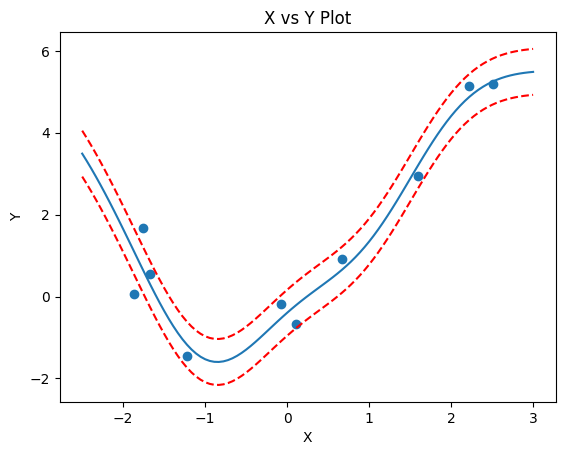

In [ ]:
#Make Phi Array
one = np.ones((len(x),1))
phi_x = np.concatenate((np.exp(-(x-2)**2), np.exp(-(x-1)**2), np.exp(-x**2), np.exp(-(x+1)**2), np.exp(-(x+2)**2), one), axis=1)

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(phi_x, y)

# Calculate Error
error = np.sum(abs(y - model.predict(phi_x)))
error_mean = error/len(x)
error_var = np.var(y - model.predict(phi_x))
print(error)
print(error_mean)
print(error_var)

# Make data for smooth graph
test_x = np.linspace(-2.5,3, 100).reshape(-1,1)
one_v = np.ones((len(test_x),1))
phi_test = np.concatenate((np.exp(-(test_x-2)**2), np.exp(-(test_x-1)**2), np.exp(-(test_x)**2), np.exp(-(test_x+1)**2), np.exp(-(test_x+2)**2), one_v), axis=1)

# Make boundary lines
up_error = model.predict(phi_test) + 2*error_var
down_error = model.predict(phi_test) - 2*error_var

# Label plot
plt.title('X vs Y Plot')
plt.xlabel('X')
plt.ylabel('Y')

# Plot and show
plt.plot(test_x, up_error, '--r')
plt.plot(test_x, down_error, '--r')
plt.plot(test_x, model.predict(phi_test))
plt.scatter(x, y)
plt.show()

Nothing new here.

I conclude that the last model was the best because it has the smallest mean error and error variance out of all the models. 

However, the polynomial model is also worth considering because the last model is potentially overfit to the data. Not only does the last model have more basis functions, but the basis functions are exponentials, which increase faster at extreme values than polynomials do. 

Although I am wary of overfitting, I conclude that the last model is the best.